In [1]:
import h5py
import os
import numpy as np
from scipy import misc
from scipy import ndimage
from data.voxelgrid import VoxelGrid
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

## Create Dataset

In [2]:
filelist = os.listdir('./wbc_data')
# with h5py.File('dataset.h5', 'w') as new_f:
#     index = 0
#     for original_file_name in filelist:
#         if '.h5' not in original_file_name:
#             continue
#         # print('Opening file: {}'.format(original_file_name))

#         with h5py.File(os.path.join('wbc_data', original_file_name), 'r') as original_f:
#             o_data = original_f['dataset1']
#             shape = o_data.shape
#             group = new_f.create_group(str(index))
            
#             # identify the label
#             if 'B' in original_file_name:
#                 label = 'B'
#             elif 'CD4' in original_file_name:
#                 label = 'CD4'
#             else:
#                 label = 'CD8'
#             # print('this file\'s label : {}'.format(label))

            
#             # fill in the data
#             new_dset = group.create_dataset('data', shape, dtype='f')
#             new_dset[...] = np.array(o_data)
#             new_dset.attrs['label'] = label
#             new_dset.attrs['id'] = index
#             new_dset.attrs['original_name'] = original_file_name
            
#             index += 1

## how to access data points

In [3]:
with h5py.File('dataset.h5', 'r') as hf:
    for data_num in hf:
        label = hf[data_num]['data'].attrs['label']
        original_name = hf[data_num]['data'].attrs['original_name']
        id = hf[data_num]['data'].attrs['id']
    
    print('sample datapoints')
    data = np.array(hf['0']['data'])
    print(label)
    print(np.max(data))
    print(np.min(data))
    print(data)

sample datapoints
B
1.41046
1.33104
[[[ 1.33655429  1.33667827  1.33687437 ...,  1.33645296  1.33689868
    1.33970761]
  [ 1.3364017   1.33693779  1.33680665 ...,  1.33696413  1.33663714
    1.33682811]
  [ 1.33661103  1.33697438  1.33693111 ...,  1.336712    1.33667457
    1.33668339]
  ..., 
  [ 1.33678639  1.33684361  1.33685863 ...,  1.33698905  1.33721852
    1.33691585]
  [ 1.33670533  1.34184921  1.3369242  ...,  1.33692074  1.33682024
    1.33695138]
  [ 1.33680153  1.33834875  1.33694434 ...,  1.33680153  1.33687079
    1.33689702]]

 [[ 1.3363806   1.33667862  1.33679605 ...,  1.33636642  1.33687675
    1.33918679]
  [ 1.33650994  1.3430047   1.33686936 ...,  1.33682454  1.33657444
    1.33692133]
  [ 1.33653748  1.33688903  1.33698964 ...,  1.33675575  1.3367722
    1.33675146]
  ..., 
  [ 1.33669865  1.33674777  1.33677626 ...,  1.33722734  1.33901703
    1.33693111]
  [ 1.33664918  1.33692813  1.33694232 ...,  1.33695972  1.33696806
    1.33892727]
  [ 1.33683646  1.33699

## Normalizing

In [4]:
def normalize(img_array):
    min_val = np.min(img_array)
    max_val = np.max(img_array)
    
    img_array -= min_val
    
    multiplier = 1 / (max_val - min_val)
    
    return img_array * multiplier

## Showing Image Test

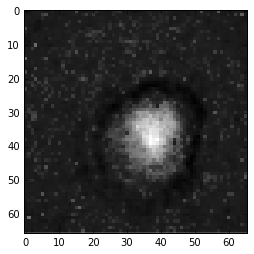

In [5]:
with h5py.File('dataset.h5', 'r') as hf:
    sample_data = normalize(np.array(hf['125']['data']))
    sample_slice = sample_data[22]
    plt.imshow(sample_slice)

## GIF test

In [6]:
import moviepy.editor as mpy

with h5py.File('dataset.h5', 'r') as hf:
    this_sample = np.array(hf['0']['data'])
    def make_frame(t):
        return this_sample[t].reshape((66, 66, 1))
    clip = mpy.VideoClip(make_frame, duration=66)
    clip.write_gif('test.gif', fps=15)


[MoviePy] Building file test.gif with imageio


100%|█████████▉| 990/991 [00:01<00:00, 948.46it/s]


# Data Augmentation

(66, 66, 66)


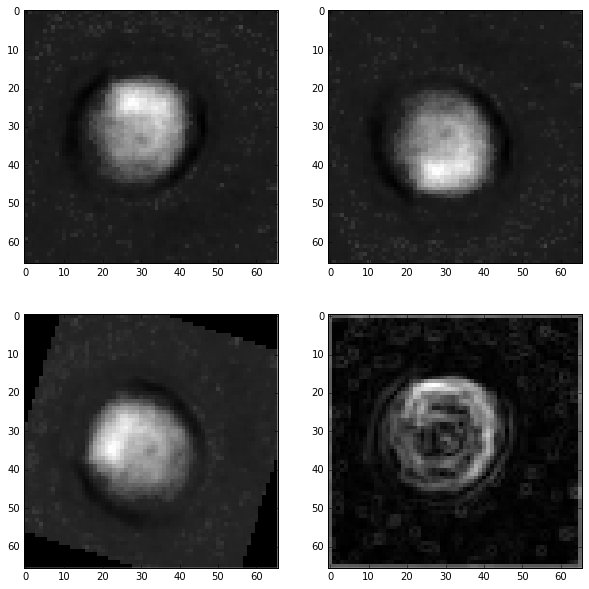

In [9]:
with h5py.File('dataset.h5', 'r') as hf:
    this_sample = normalize(np.array(hf['232']['data']))
    this_slice = this_sample[24]  # original
    
    # flipped slice
    flipped_slice = np.flipud(this_slice)  # flip!
    rotated_slice = ndimage.rotate(this_slice, 72, reshape=False) # rotate!
    
    # edge-detection
    sob_x = ndimage.sobel(this_slice, axis=1, mode='constant')
    sob_y = ndimage.sobel(this_slice, axis=0, mode='constant')
    sob = np.hypot(sob_x, sob_y)
    sample_other_dim = normalize(np.array(hf['232']['data']))
    
    # now plot them
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.imshow(this_slice) # original
    plt.subplot(222)
    plt.imshow(flipped_slice)  # flipped
    plt.subplot(223)
    plt.imshow(rotated_slice)  # rotate
    plt.subplot(224)
    plt.imshow(sob)  # edge-detected
    

## Slicing data in different axis.

In [10]:
# (z, y, x) shape -> so sample[n] produces a slice through 'z' axis.
# to create a slice in 'y' axis, sample[:][y_val][:]
# for all z values, select the x-row in designated y-value and make a 2D image:
# for z in shape:
#     this_row = shape[z][y_val]
#     shape[z] = this_row


# same goes for the x-slice.